# Neural networks
Lecturer: Dr Andrzej Tomski, WSB-NLU  

> Author: Andrzej Kocielski, 2023-2024  
> email: <akocielski@student.wsb-nlu.edu.pl>, <and.koc001@gmail.com>
___

## Exercise 5

Built a classification model, using dataset "Pima Indians Diabetes Database" ([Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)).


### Importing libraries and set up

In [1]:
# Imports

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# ignore warnings
import warnings 
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler # used for standardisation of data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential # model of ANN
from keras.layers import Dense # layers of ANN

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True, formatter={'float':'{0.2f}'.format})

### Load and inspect data

In [3]:
# Load dataset from file
data = pd.read_csv('diabetes.csv')
# Data inspection
print(f"Shape of dataframe: {data.shape}\n")
print(data.info(), "\n")
print(data.describe())

Shape of dataframe: (768, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      

All features are numeric, with no missing data.

#### Data cleaning

Although one observation (the one with SkinThickness = 99) seem to be incorrect, I am going to leave it in for further analysis. The reason being lack of the subject expertise, i.e. it may be actually fair measure.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


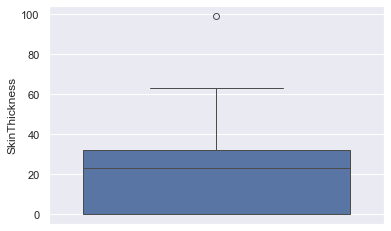

In [4]:
sns.boxplot(data["SkinThickness"])
# The below observation appear to be invalid
data[data["SkinThickness"] > 65]

___
## Preparing the data

This exercise is a binary classification problem, where patients fall in one of two categories diagnosed with diabetes or not, based on the other data in the dataset. 
A suitable ANN for such a task is a _feed forward_ kind of NN.

#### Separate outcome from predictors
Since the dataset already includes the outcome, that information should be separated from the other predictors for the training and validation of the NN.

In [5]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['Outcome']
Predictors = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = data[Predictors].values
y = data[TargetVariable].values

#### Standardisation and fitting the values

Standardisation of values, using `StandardScaler` from sklearn.preprocessing library

In [6]:
# Set StandardScaler to both datasets
PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)
# TargetVarScalerFit = TargetVarScaler.fit(y) # disabled, as output is already either 0 or 1

# Generating the standardised values of X and y
X = PredictorScalerFit.transform(X)
# y = TargetVarScalerFit.transform(y)

#### Train-test subsets

Splitting the data into training and testing sets, using method `train_test_split` from scikit-learn.

In [7]:
# Split data into 70% training and 30% testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 8) (537, 1)
(231, 8) (231, 1)


## Build ANN

#### Neural Net model

For this exercise, `Sequential` model will be used, with consecutive layers of neurons. The net will be composed of the following layers:
1. Input layer
2. Hidden layers - 2 off
3. Output layer

The NN will be trained on the `training` subset, and validated on the `test` subset. 

The NN is charactrised with the following parameters:
- _activation function_ - specifies the activation function for the computations inside each neuron. For binary classification problem the best are 's-shaped' activation functions, such as sigmoid.
- _loss function_ - specifies loss function that checks the prediction against the true value; for binary classification _binary_crossentropy_ is recommended.
- _optimiser_ - used for minimizing the error, e.g. adaptive moment estimation (ADAM) 

#### Hyperparameters  

The following hyperparameters will be used for tuning each layer of the NN.

- _units_ 
- _input_dim_
- _kernel_initializer_
- _activation_

Also, the entrie NN will be optimised, using the following hyperparameters:
- _batch_size_
- _epochs_ 

#### Evaluation
Quality (metrics) of the NN will be scored by evaluating the _accuracy_ of the model.

### Training the model

In [8]:
# Fitting the ANN to the Training set
def nn_quick_model(X_train, y_train, X_test, y_test):
    
    # create ANN model
    model = Sequential()
    # Building the layers of the net
    model.add(Dense(units=12, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    # Defining the Second layer of the model
    # model.add(Dense(units=12, kernel_initializer='normal', activation='relu'))
    # Defining the next layer of the model
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    # The output neuron is a single fully connected node, suitable for binary classification
    model.add(Dense(units=1, activation='sigmoid'))
    # Compiling the model
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # model info
    model.summary()
    
    history = model.fit(
        x = X_train, y = y_train,
        epochs = 50,
        batch_size = 20,
        validation_data = (X_test, y_test),
        verbose = 1,
    )
    
    loss_and_metrics = model.evaluate(X_test, y_test)
    print('Loss = ',loss_and_metrics[0])
    print('Accuracy = ',loss_and_metrics[1])
    
    return(history)

In [9]:
hist = nn_quick_model(X_train, y_train, X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 5)                 65        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 179 (716.00 Byte)
Trainable params: 179 (716.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
27/27 [==============================] - 1s 9ms/step - loss: 0.6840 - accuracy: 0.7207 - val_loss: 0.6794 - val_accuracy: 0.7229
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.7616 - val_loss: 0.6671 - val_accuracy: 0.7100
Ep

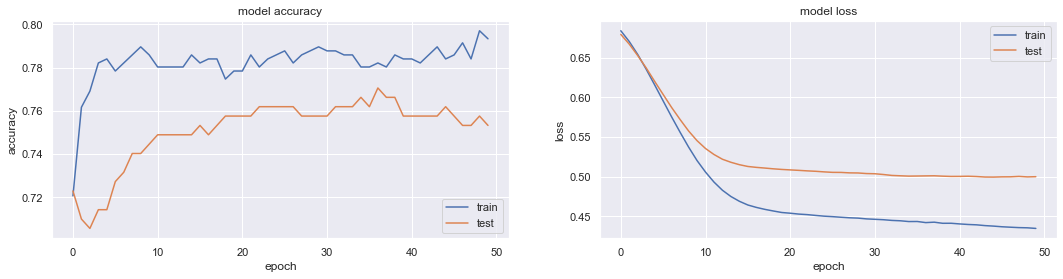

In [10]:
plt.figure(figsize=(18,4))

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

## Searching for the best parameters for the ANN

#### Training the model

Further parameters for tuning the model:
- _batch_size_ - Specifies how many rows will be fed to the network at one time, after which calculation will begin and the neural network will begin to adjust its weights based on errors.
- _epochs_ - The same weight adjustment action is continued 50 times according to this parameter. To put it simply, the ANN looks at the full training data 50 times and adjusts its weights.

In [11]:
def FindBestParams(X_train, y_train, X_test, y_test):
    """ 
    Function finds the best parameters for training the ANN.
    """    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 20, 40]
    epoch_list = [10, 20, 30, 40]
    
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            print()
            TrialNumber+=1
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
            # Defining the second layer of the model
            # model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))
            # Defining the next layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
            # The output neuron 
            model.add(Dense(units=1, activation='sigmoid'))

            # Compiling the model
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            
            # Fitting the ANN to the Training set
            history = model.fit(
                X_train, y_train,
                epochs=epochs_trial,
                batch_size=batch_size_trial,
                validation_data=(X_test, y_test),
                verbose=0,
                )

            accu = model.evaluate(X_test, y_test)[1]
            
            trial_result = pd.DataFrame(
                data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), accu]],
                            columns=['TrialNumber', 'Parameters', 'Accuracy'])
            print(trial_result)

            SearchResultsData = pd.concat([SearchResultsData, trial_result], ignore_index=True)
            # SearchResultsData = SearchResultsData.append(trial_result)) # deprecated in Pandas 2.0
    
    return(SearchResultsData)

In [12]:
# Calling the function
ResultsData = FindBestParams(X_train, y_train, X_test, y_test)

# Best accuracy
max_accuracy = ResultsData.loc[ResultsData['Accuracy'].idxmax()]
print(f"\nBest accuracy found: {max_accuracy[-1]:.5f}, with corresponding batch size and number of epochs: {max_accuracy[1]}.")


8/8 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7576
   TrialNumber Parameters  Accuracy
0            1       5-10  0.757576

8/8 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7792
   TrialNumber Parameters  Accuracy
0            2       5-20  0.779221

8/8 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7619
   TrialNumber Parameters  Accuracy
0            3       5-30  0.761905

8/8 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7619
   TrialNumber Parameters  Accuracy
0            4       5-40  0.761905

8/8 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7619
   TrialNumber Parameters  Accuracy
0            5      10-10  0.761905

8/8 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7619
   TrialNumber Parameters  Accuracy
0            6      10-20  0.761905

8/8 [==============================] - 0s 2ms/step 

___
## Logistic regression model

For comparison, logistic regression model is used.

The same dataset and subsets are used (`X_train`, `X_test`, `y_train`, `y_test`).

In [13]:
# Quick sanity check with the shapes of Training and testing datasets
print(f"Train inputs {X_train.shape}, train outputs {y_train.shape}")
print(f"Test inputs {X_test.shape}, test outputs {y_test.shape}")

Train inputs (537, 8), train outputs (537, 1)
Test inputs (231, 8), test outputs (231, 1)


In [14]:
# create an instance of a LinearRegression() model named lin_reg_model.
log_reg_model = LogisticRegression(random_state=2023)

#Train/fit lin_reg_model on the training data.
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=2023)

In [15]:
# calculate predictions
predictions = log_reg_model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [17]:
# accuracy of the linear regression model
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix
log_reg_accu = accuracy_score(y_test, predictions)
print(f"Accuracy: {log_reg_accu:.5f}")


Accuracy: 0.76190


## Findings

Both models were compared using _accuracy_ metrics.  

The following are the found accuracies of both models:

In [18]:
print(f"ANN accuracy:\t {max_accuracy[-1]:.5f}")
print(f"LogR accuracy:\t {log_reg_accu:.5f}")

ANN accuracy:	 0.77922
LogR accuracy:	 0.76190


References:
- Lecture and lab notes compiled by the lecturer
- <https://www.freecodecamp.org/news/binary-classification-made-simple-with-tensorflow/>
- <https://www.youtube.com/watch?v=PM6uvCLyeXM&ab_channel=BadriAdhikari>
- <https://machinelearningmastery.com/cross-entropy-for-machine-learning/>
- <https://www.datacamp.com/tutorial/understanding-logistic-regression-python>
- <https://towardsdatascience.com/logistic-regression-for-binary-classification-56a2402e62e6>
- <https://github.com/andkoc001/Machine-Learning-and-Statistics-Project>

___
Andrzej Kocielski, 2023